## Imports

In [1]:
from transformers.models.auto.tokenization_auto import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import re

/home/deepali/anaconda3/envs/torch_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tqdm.pandas()

## Tokenizer

In [3]:
model_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

## Loading Data

In [4]:
data_dir =  "../Data/"
os.listdir(data_dir)

['vocab.py',
 'train.ipynb',
 'train_data.csv',
 'Exploring Data.ipynb',
 'test_data.csv',
 'vocab.json']

In [5]:
train_data = pd.read_csv(os.path.join(data_dir, 'train_data.csv'))
test_data = pd.read_csv(os.path.join(data_dir, 'test_data.csv'))

## Processing Text

In [6]:
def process_text(text: str):
    """
    This removes
     - URLs
     - Usernames
     - Punctations (replace them with  ' ')
     - Numbers (replace them with ' ')
     - Multiple Spaces together (replace them with ' ')
    """
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r' www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'[^\w\s]|[\d]', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text = text.strip().lower().encode('ascii', 'ignore').decode()
    return text

In [7]:
def process_text(text: str):
    """
    This removes
    - URLs
    - Username
    - Punctations (replace them with  ' ')
    - Numbers (replace them with  ' ')
    - Multiple spaces together (replace them with  ' ')"""
    text = re.sub(r'http[s]?://\S+', '', text) 
    text = re.sub(r' www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'[^\w\s]|[\d]', ' ', text)
    text = text.strip().lower().encode('ascii', 'ignore').decode()
    return text

In [8]:
train_data['sentence'] = train_data['sentence'].progress_map(process_text)
test_data['sentence'] = test_data['sentence'].progress_map(process_text)
train_data.head()

100%|██████████| 359/359 [00:00<00:00, 196650.79it/s]


,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [9]:
test_data.head()

,sentence,sentiment
0,i loooooooovvvvvveee my kindle not that the dx...,1
1,reading my kindle love it lee childs is good read,1
2,ok first assesment of the kindle it fucking rocks,1
3,you ll love your kindle i ve had mine for a fe...,1
4,fair enough but i have the kindle and i think ...,1


## Removing Blanks

In [10]:
train_data = train_data[train_data['sentence'] != ''].reset_index(drop=True)

In [11]:
train_data = train_data[train_data['sentence'] != ''].reset_index(drop=True)

## Removing neutrals from the test_csv

In [12]:
test_data = test_data[test_data['sentiment'] > -1].reset_index(drop=True)

## Removing Duplicates

In [13]:
print("Before")
print("Duplicates in Train Set:", train_data.duplicated().sum())
print("Duplicates in Test Set:", test_data.duplicated().sum())

print()
# There are a few duplicates in the training_set (About 16.309k)
train_data = train_data[~train_data.duplicated()].reset_index(drop=True)

print("After")
print("Duplicates in Train Set:", train_data.duplicated().sum())
print("Duplicates in Test Set:", test_data.duplicated().sum())

Before
Duplicates in Train Set: 0
Duplicates in Test Set: 0

After
Duplicates in Train Set: 0
Duplicates in Test Set: 0


## Saving Processed Files

In [16]:
from transformers import AutoTokenizer
from tqdm import tqdm  # For progress mapping

tqdm.pandas()  # To use progress_map

# Initialize your tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a function to tokenize and pad
def tokenize_and_pad(sentence):
    return tokenizer(
        sentence,
        padding='max_length',  # Pads to max length (use `True` for batch padding)
        truncation=True,       # Truncate sentences longer than max_length
        max_length=128,        # Maximum sequence length
        return_tensors=None    # Return Python lists instead of PyTorch tensors
    )['input_ids']  # Extract only the input IDs

# Apply tokenization and padding
train_data['encoded'] = train_data['sentence'].progress_map(tokenize_and_pad)
train_data['lengths'] = train_data['encoded'].map(len)

test_data['encoded'] = test_data['sentence'].progress_map(tokenize_and_pad)
test_data['lengths'] = test_data['encoded'].map(len)


100%|██████████| 359/359 [00:00<00:00, 16148.03it/s]


## Exploring the lengths of sentences

In [14]:
train_data['encoded'] = train_data['sentence'].progress_map(tokenizer.encode)
train_data['lengths'] = train_data['encoded'].map(len)

test_data['encoded'] = test_data['sentence'].progress_map(tokenizer.encode)
test_data['lengths'] = test_data['encoded'].map(len)

100%|██████████| 359/359 [00:00<00:00, 22046.52it/s]


In [ ]:
# Deleting, if any
!rm train_data.csv test_data.csv

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
train_data.head()

,sentence,sentiment,encoded,lengths
0,awww that s a bummer you shoulda got david car...,0,"[0, 1584, 33130, 14, 579, 10, 741, 22539, 47, ...",23
1,is upset that he can t update his facebook by ...,0,"[0, 354, 4904, 14, 37, 64, 326, 2935, 39, 1066...",24
2,i dived many times for the ball managed to sav...,0,"[0, 118, 385, 19133, 171, 498, 13, 5, 1011, 23...",19
3,my whole body feels itchy and like its on fire,0,"[0, 4783, 1086, 809, 2653, 24, 17414, 8, 101, ...",13
4,no it s not behaving at all i m mad why am i h...,0,"[0, 2362, 24, 579, 45, 29744, 23, 70, 939, 475...",25


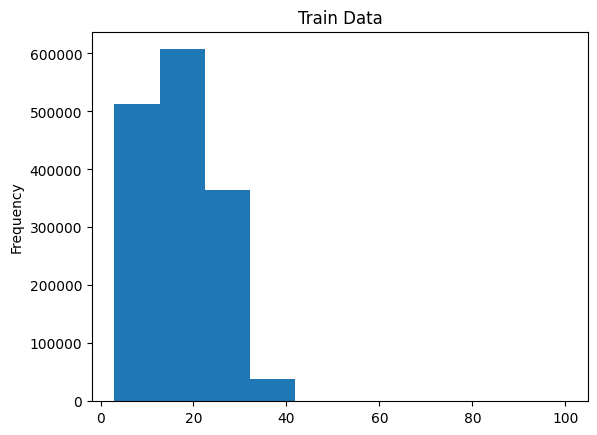

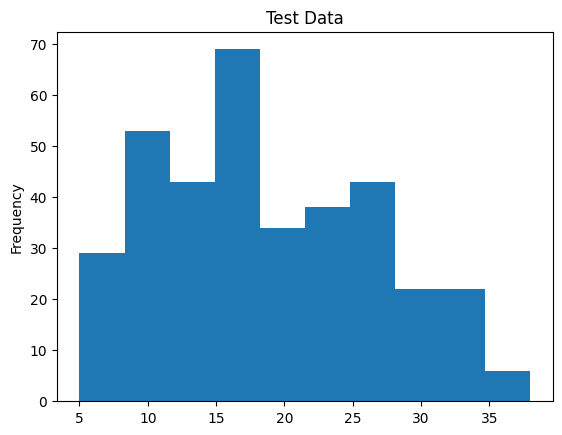

In [16]:
plt.title("Train Data")
train_data['lengths'].plot.hist()
plt.show()

plt.title("Test Data")
test_data['lengths'].plot.hist()
plt.show()

## Counting UNK words

In [15]:
unk_words = sum([tokenizer.unk_token_id in encoded for encoded in train_data['encoded']])
print(f"There are {unk_words} unk words in train")

unk_words = sum([tokenizer.unk_token_id in encoded for encoded in test_data['encoded']])
print(f"There are {unk_words} unk words in test")

There are 0 unk words in train
There are 0 unk words in test


## Cheking label counts

0    766982
1    756696
Name: sentiment, dtype: int64


<AxesSubplot:>

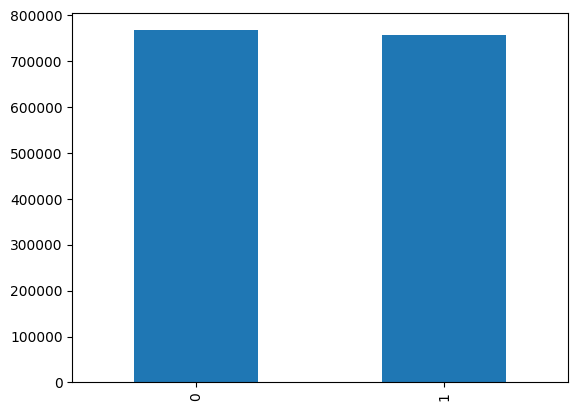

In [18]:
print(train_data['sentiment'].value_counts())
train_data['sentiment'].value_counts().plot.bar()

1    182
0    177
Name: sentiment, dtype: int64


<AxesSubplot:>

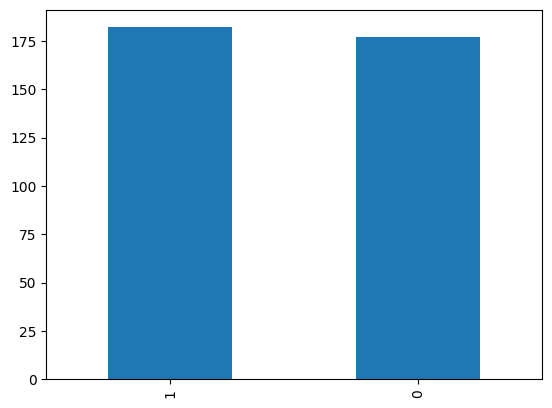

In [19]:
print(test_data['sentiment'].value_counts())
test_data['sentiment'].value_counts().plot.bar()

# Thank You